In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\teligram data\Details.csv')

In [20]:
df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card
...,...,...,...,...,...,...,...
1495,B-25700,7,-3,2,Clothing,Hankerchief,COD
1496,B-25757,3151,-35,7,Clothing,Trousers,EMI
1497,B-25973,4141,1698,13,Electronics,Printers,COD
1498,B-25698,7,-2,1,Clothing,Hankerchief,COD


In [5]:
df1=df.drop(['Order ID'],axis=1)

In [6]:
df1

,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,1096,658,7,Electronics,Electronic Games,COD
1,5729,64,14,Furniture,Chairs,EMI
2,2927,146,8,Furniture,Bookcases,EMI
3,2847,712,8,Electronics,Printers,Credit Card
4,2617,1151,4,Electronics,Phones,Credit Card
...,...,...,...,...,...,...
1495,7,-3,2,Clothing,Hankerchief,COD
1496,3151,-35,7,Clothing,Trousers,EMI
1497,4141,1698,13,Electronics,Printers,COD
1498,7,-2,1,Clothing,Hankerchief,COD


In [7]:
df1.dropna()

,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,1096,658,7,Electronics,Electronic Games,COD
1,5729,64,14,Furniture,Chairs,EMI
2,2927,146,8,Furniture,Bookcases,EMI
3,2847,712,8,Electronics,Printers,Credit Card
4,2617,1151,4,Electronics,Phones,Credit Card
...,...,...,...,...,...,...
1495,7,-3,2,Clothing,Hankerchief,COD
1496,3151,-35,7,Clothing,Trousers,EMI
1497,4141,1698,13,Electronics,Printers,COD
1498,7,-2,1,Clothing,Hankerchief,COD


In [8]:
df1=df1.drop(['Sub-Category'],axis=1)

In [9]:
df1['PaymentMode'].value_counts()

COD            684
UPI            331
Debit Card     202
Credit Card    163
EMI            120
Name: PaymentMode, dtype: int64

In [10]:
df1

,Amount,Profit,Quantity,Category,PaymentMode
0,1096,658,7,Electronics,COD
1,5729,64,14,Furniture,EMI
2,2927,146,8,Furniture,EMI
3,2847,712,8,Electronics,Credit Card
4,2617,1151,4,Electronics,Credit Card
...,...,...,...,...,...
1495,7,-3,2,Clothing,COD
1496,3151,-35,7,Clothing,EMI
1497,4141,1698,13,Electronics,COD
1498,7,-2,1,Clothing,COD


In [11]:
df1['Category'].unique()

array(['Electronics', 'Furniture', 'Clothing'], dtype=object)

<AxesSubplot:>

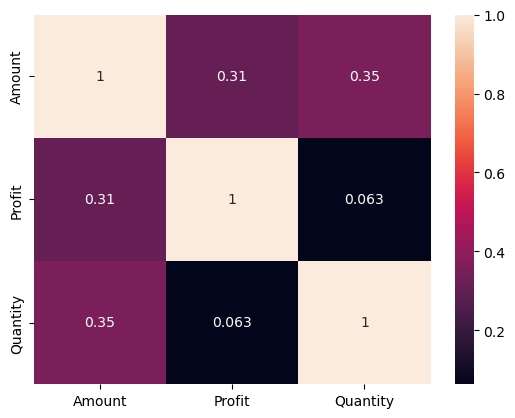

In [12]:
sns.heatmap(data=df1.corr(),annot=True)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
e=LabelEncoder()

In [22]:
x=df1['Category']

In [23]:
x

0       Electronics
1         Furniture
2         Furniture
3       Electronics
4       Electronics
           ...     
1495       Clothing
1496       Clothing
1497    Electronics
1498       Clothing
1499      Furniture
Name: Category, Length: 1500, dtype: object

In [24]:
e.fit(x)

LabelEncoder()

In [ ]:
#df['Education'].replace(['Under-Graduate', 'Diploma '],
                        [0, 1], inplace=True)

In [26]:
en_cate=e.transform(x)

In [31]:
ed=pd.DataFrame(en_cate,columns=['category'])

In [32]:
ed

,category
0,1
1,2
2,2
3,1
4,1
...,...
1495,0
1496,0
1497,1
1498,0


In [34]:
df2=pd.concat([df1,ed],axis=1)

In [38]:
df2=df2.drop(['Category'],axis=1)

In [39]:
df2

,Amount,Profit,Quantity,PaymentMode,category
0,1096,658,7,COD,1
1,5729,64,14,EMI,2
2,2927,146,8,EMI,2
3,2847,712,8,Credit Card,1
4,2617,1151,4,Credit Card,1
...,...,...,...,...,...
1495,7,-3,2,COD,0
1496,3151,-35,7,EMI,0
1497,4141,1698,13,COD,1
1498,7,-2,1,COD,0


In [40]:
y=df2['PaymentMode']

In [41]:
e=LabelEncoder()

In [42]:
e.fit(y)

LabelEncoder()

In [43]:
en_cate=e.transform(y)

In [44]:
ed=pd.DataFrame(en_cate,columns=['PaymentMode'])

In [50]:
ed

,PaymentMode
0,0
1,3
2,3
3,1
4,1
...,...
1495,0
1496,3
1497,0
1498,0


In [51]:
df2=pd.concat([df2,ed],axis=1)

In [52]:
df2

,Amount,Profit,Quantity,category,PaymentMode
0,1096,658,7,1,0
1,5729,64,14,2,3
2,2927,146,8,2,3
3,2847,712,8,1,1
4,2617,1151,4,1,1
...,...,...,...,...,...
1495,7,-3,2,0,0
1496,3151,-35,7,0,3
1497,4141,1698,13,1,0
1498,7,-2,1,0,0


In [130]:
df2=df2.drop(['Profit'],axis=1)

In [131]:
x=df2[[col for col in df2.columns if col!='PaymentMode']]

In [132]:
x

,Amount,Quantity,category
0,1096,7,1
1,5729,14,2
2,2927,8,2
3,2847,8,1
4,2617,4,1
...,...,...,...
1495,7,2,0
1496,3151,7,0
1497,4141,13,1
1498,7,1,0


In [133]:
y=df2['PaymentMode']

In [134]:
y

0       0
1       3
2       3
3       1
4       1
       ..
1495    0
1496    3
1497    0
1498    0
1499    3
Name: PaymentMode, Length: 1500, dtype: int32

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [137]:
from sklearn.linear_model import LogisticRegression 

In [138]:
obj=LogisticRegression(penalty='l1', dual=False, tol=0.0001, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='auto')

In [139]:
obj

LogisticRegression(penalty='l1', solver='liblinear')

In [140]:
obj.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [141]:
obj.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [142]:
y_pred=obj.predict(x_test)

In [143]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [144]:
obj.score(x_test,y_test) 

0.4688888888888889

In [145]:
from sklearn.metrics import confusion_matrix

In [146]:
cf=confusion_matrix(y_test,y_pred)

In [147]:
cf

array([[207,   2,   0,   0,   0],
       [ 39,   3,   0,   1,   0],
       [ 67,   0,   0,   0,   0],
       [ 25,   3,   0,   1,   0],
       [ 99,   3,   0,   0,   0]], dtype=int64)

In [148]:
from sklearn.metrics import confusion_matrix,classification_report

In [149]:
cr=classification_report(y_test,y_pred)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
print(cr)

              precision    recall  f1-score   support

           0       0.47      0.99      0.64       209
           1       0.27      0.07      0.11        43
           2       0.00      0.00      0.00        67
           3       0.50      0.03      0.06        29
           4       0.00      0.00      0.00       102

    accuracy                           0.47       450
   macro avg       0.25      0.22      0.16       450
weighted avg       0.28      0.47      0.31       450



In [151]:
obj.score(x_train,y_train) 

0.4657142857142857

In [152]:
obj.score(x_test,y_test)  

0.4688888888888889

In [153]:
###random forest

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [155]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state =5)
svc = SVC()
lc = LogisticRegression()

In [156]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(Y_test,y_predkn,labels=[0,1]))
print(confusion_matrix(Y_test,y_predkn))

NameError: name 'Y_test' is not defined

In [157]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state =0)

In [158]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [159]:
y_predict=rfc.predict(x_test)

In [160]:
y_predict

array([2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 1, 0, 0, 4, 0, 2,
       0, 4, 0, 2, 0, 0, 0, 4, 2, 0, 4, 0, 0, 0, 0, 1, 2, 4, 0, 4, 1, 0,
       2, 1, 2, 1, 1, 3, 1, 3, 2, 0, 1, 0, 1, 4, 1, 4, 0, 0, 4, 3, 2, 2,
       0, 1, 4, 4, 2, 4, 4, 0, 0, 4, 0, 2, 4, 2, 2, 0, 1, 4, 4, 1, 0, 2,
       0, 0, 0, 0, 2, 4, 0, 1, 0, 2, 1, 0, 4, 0, 1, 2, 0, 0, 4, 0, 2, 1,
       0, 0, 3, 1, 0, 0, 0, 1, 0, 2, 3, 4, 1, 2, 0, 0, 0, 2, 0, 0, 4, 0,
       4, 1, 2, 0, 1, 0, 4, 0, 4, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0, 1, 4,
       3, 1, 0, 0, 0, 3, 4, 2, 3, 1, 1, 0, 0, 4, 4, 0, 0, 4, 0, 3, 0, 0,
       0, 3, 4, 2, 0, 2, 0, 4, 4, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 3, 0, 0,
       3, 0, 0, 0, 0, 4, 2, 2, 3, 3, 0, 0, 3, 0, 0, 2, 1, 2, 0, 1, 0, 0,
       0, 0, 2, 0, 4, 4, 1, 1, 4, 0, 4, 2, 0, 0, 0, 3, 4, 0, 3, 2, 0, 1,
       2, 0, 0, 4, 4, 0, 3, 2, 4, 0, 0, 0, 0, 4, 4, 1, 0, 0, 4, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 2, 4, 0, 0, 2, 0, 0, 4, 0, 4, 4, 0, 4, 2,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 4, 0, 0, 0, 4, 2,

In [161]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [162]:
print(classification_report(y_test,y_predict,labels=[0,1]))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.45      0.45      0.45       209
           1       0.09      0.09      0.09        43

   micro avg       0.38      0.39      0.39       252
   macro avg       0.27      0.27      0.27       252
weighted avg       0.39      0.39      0.39       252

[[95 25 41 11 37]
 [21  4  5  3 10]
 [36  5 15  4  7]
 [10  5  2  8  4]
 [50  8 14  5 25]]


In [163]:
accuracy_score(y_test,y_predict)

0.32666666666666666